In [2]:
import pandas as pd

In [4]:
dataset = pd.read_csv('Salary_Data.csv')


In [5]:
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [6]:
indep_input = dataset[['YearsExperience']]

In [7]:
indep_input

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [8]:
depend_output = dataset[['Salary']]

In [9]:
depend_output

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [10]:
import matplotlib.pyplot as plt

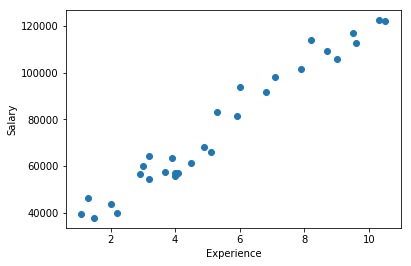

In [11]:
plt.scatter(indep_input, depend_output)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(indep_input, depend_output,test_size = 0.30, random_state = 0)

In [14]:
x_train.shape

(21, 1)

In [15]:
len(x_train)

21

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression()

In [18]:
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
weight = regressor.coef_
weight

array([[9360.26128619]])

In [21]:
bias = regressor.intercept_
bias

array([26777.3913412])

In [22]:
y_pred = regressor.predict(x_test)
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [25]:
predActual = pd.DataFrame(index = range(0,10))

In [26]:
predActual['Actual'] = y_test
predActual

,Actual
0,NaN
1,NaN
2,37731.0
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [27]:
y_test.index = range(0,9)

In [28]:
predActual['Actual'] = y_test
predActual

,Actual
0,37731.0
1,122391.0
2,57081.0
3,63218.0
4,116969.0
5,109431.0
6,112635.0
7,55794.0
8,83088.0
9,NaN


In [29]:
y_predTab = pd.DataFrame(y_pred, columns=['Pred'])
y_predTab

,Pred
0,40817.783270
1,123188.082589
2,65154.462615
3,63282.410357
4,115699.873560
5,108211.664531
6,116635.899689
7,64218.436486
8,76386.776158


In [30]:
predActual['PredValue'] = y_predTab
predActual

,Actual,PredValue
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158
9,NaN,NaN


In [31]:
from sklearn.metrics import r2_score

In [32]:
r = r2_score(y_test, y_pred)

In [33]:
r

0.9740993407213511

In [34]:
import pickle
modelfile = 'LinearRegressionModel.sav'
pickle.dump(regressor, open(modelfile,'wb'))

### Deployment

In [35]:
load_model = pickle.load(open('LinearRegressionModel.sav', 'rb'))

In [36]:
test_predict = load_model.predict([[15]])

In [37]:
test_predict

array([[167181.3106341]])